# Data Exploration - Movie Dataset

In [1]:
import sys
sys.path.insert(0, '../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

## 1. Data Loading & Overview

In [2]:
df = pd.read_csv('../data/raw/imdb_movies.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total movies: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Columns: {list(df.columns)}")

Dataset shape: (10178, 12)
Total movies: 10,178
Total columns: 12
Columns: ['names', 'date_x', 'score', 'genre', 'overview', 'crew', 'orig_title', 'status', 'orig_lang', 'budget_x', 'revenue', 'country']


In [3]:
df.head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
5,Cocaine Bear,02/23/2023,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU
6,John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU
7,Puss in Boots: The Last Wish,12/26/2022,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU
8,Attack on Titan,09/30/2022,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,2.549465e+08,US
9,The Park,03/02/2023,58.0,"Action, Drama, Horror, Science Fiction, Thriller",A dystopian coming-of-age movie focused on thr...,"Chloe Guidry, Ines, Nhedrick Jabier, Bui, Carm...",The Park,Released,English,119200000.0,4.889625e+08,US


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [5]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


## 2. Data Quality Analysis

In [6]:
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)

print("MISSING VALUES ANALYSIS")
print("="*60)
print(missing_df[missing_df['Missing Count'] > 0])

MISSING VALUES ANALYSIS
       Missing Count  Percentage
genre             85    0.835135
crew              56    0.550206


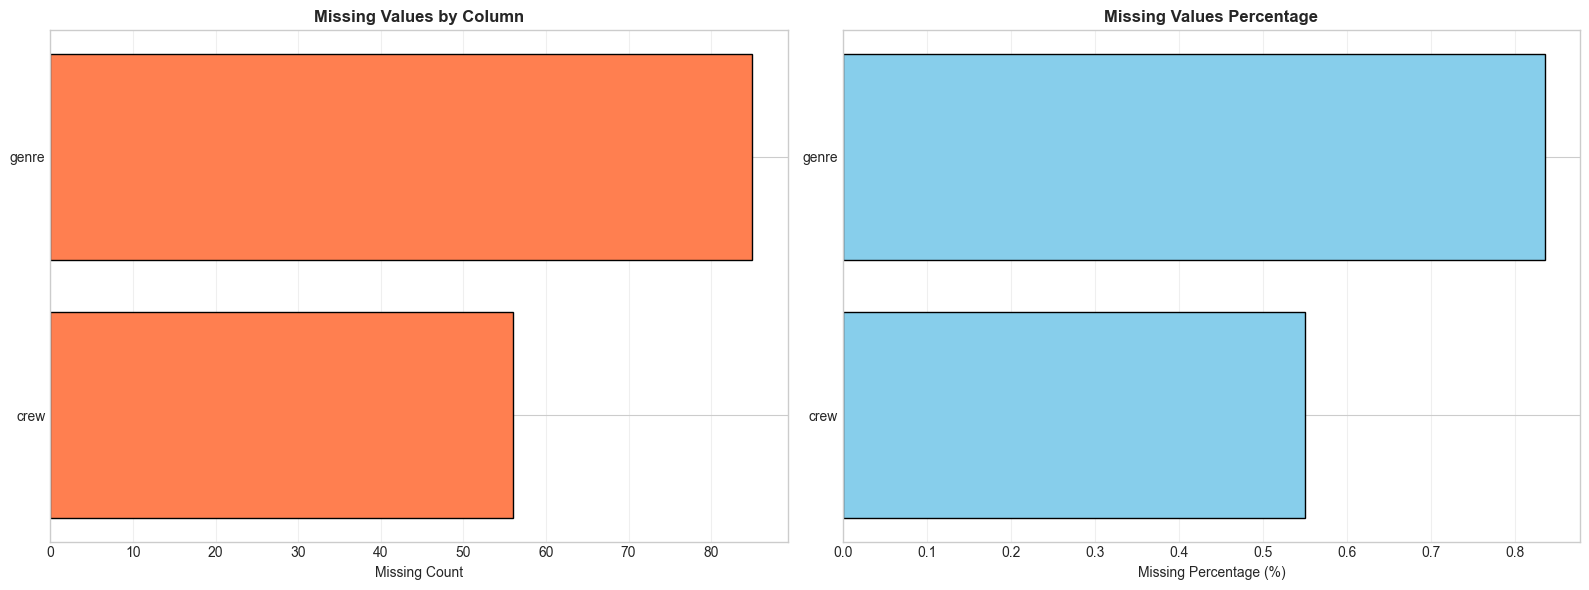

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

missing_cols = missing_df[missing_df['Missing Count'] > 0]
if len(missing_cols) > 0:
    axes[0].barh(range(len(missing_cols)), missing_cols['Missing Count'], color='coral', edgecolor='black')
    axes[0].set_yticks(range(len(missing_cols)))
    axes[0].set_yticklabels(missing_cols.index)
    axes[0].set_xlabel('Missing Count')
    axes[0].set_title('Missing Values by Column', fontweight='bold')
    axes[0].invert_yaxis()
    axes[0].grid(axis='x', alpha=0.3)

if len(missing_cols) > 0:
    axes[1].barh(range(len(missing_cols)), missing_cols['Percentage'], color='skyblue', edgecolor='black')
    axes[1].set_yticks(range(len(missing_cols)))
    axes[1].set_yticklabels(missing_cols.index)
    axes[1].set_xlabel('Missing Percentage (%)')
    axes[1].set_title('Missing Values Percentage', fontweight='bold')
    axes[1].invert_yaxis()
    axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
total_duplicates = df.duplicated().sum()
name_duplicates = df['names'].duplicated(keep=False).sum()

print(f"Total duplicate rows: {total_duplicates}")
print(f"Movies with duplicate titles: {name_duplicates}")
print(f"Note: Duplicate titles may be remakes or different versions")

if name_duplicates > 0:
    dup_titles = df[df['names'].duplicated(keep=False)].sort_values('names')
    print(f"Example duplicate titles:")
    print(dup_titles[['names', 'date_x', 'score']].head(10))

Total duplicate rows: 0
Movies with duplicate titles: 840
Note: Duplicate titles may be remakes or different versions
Example duplicate titles:
                             names       date_x  score
2072                  12 Angry Men  10/10/1957    85.0
9741                  12 Angry Men  08/17/1997    77.0
7283  20,000 Leagues Under the Sea  12/29/1955    71.0
7284  20,000 Leagues Under the Sea  12/29/1955    71.0
7213             A Christmas Carol  10/09/1984    74.0
3028             A Christmas Carol  11/05/2009    69.0
2811     A Nightmare on Elm Street  05/20/2010    55.0
2810     A Nightmare on Elm Street  05/20/2010    55.0
2374     A Nightmare on Elm Street  08/01/1985    73.0
2373     A Nightmare on Elm Street  08/01/1985    73.0


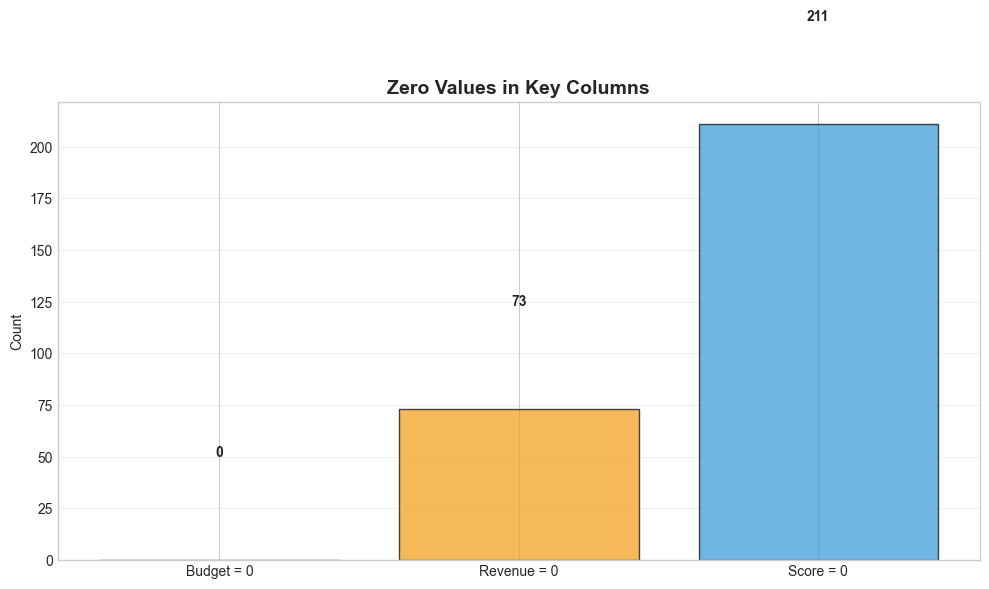

Budget = 0: 0 (0.0%)
Revenue = 0: 73 (0.7%)
Score = 0: 211 (2.1%)


In [9]:
zero_budget = (df['budget_x'] == 0).sum()
zero_revenue = (df['revenue'] == 0).sum()
zero_score = (df['score'] == 0).sum()

fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Budget = 0', 'Revenue = 0', 'Score = 0']
counts = [zero_budget, zero_revenue, zero_score]
colors = ['#e74c3c', '#f39c12', '#3498db']

ax.bar(categories, counts, color=colors, edgecolor='black', alpha=0.7)
ax.set_ylabel('Count')
ax.set_title('Zero Values in Key Columns', fontweight='bold', fontsize=14)
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(counts):
    ax.text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Budget = 0: {zero_budget:,} ({zero_budget/len(df)*100:.1f}%)")
print(f"Revenue = 0: {zero_revenue:,} ({zero_revenue/len(df)*100:.1f}%)")
print(f"Score = 0: {zero_score:,} ({zero_score/len(df)*100:.1f}%)")

## 3. Score Distribution Analysis

In [10]:
print("SCORE STATISTICS")
print("="*60)
print(f"Mean: {df['score'].mean():.2f}")
print(f"Median: {df['score'].median():.2f}")
print(f"Std Dev: {df['score'].std():.2f}")
print(f"Min: {df['score'].min():.1f}")
print(f"Max: {df['score'].max():.1f}")
print(f"25th percentile: {df['score'].quantile(0.25):.2f}")
print(f"75th percentile: {df['score'].quantile(0.75):.2f}")

SCORE STATISTICS
Mean: 63.50
Median: 65.00
Std Dev: 13.54
Min: 0.0
Max: 100.0
25th percentile: 59.00
75th percentile: 71.00


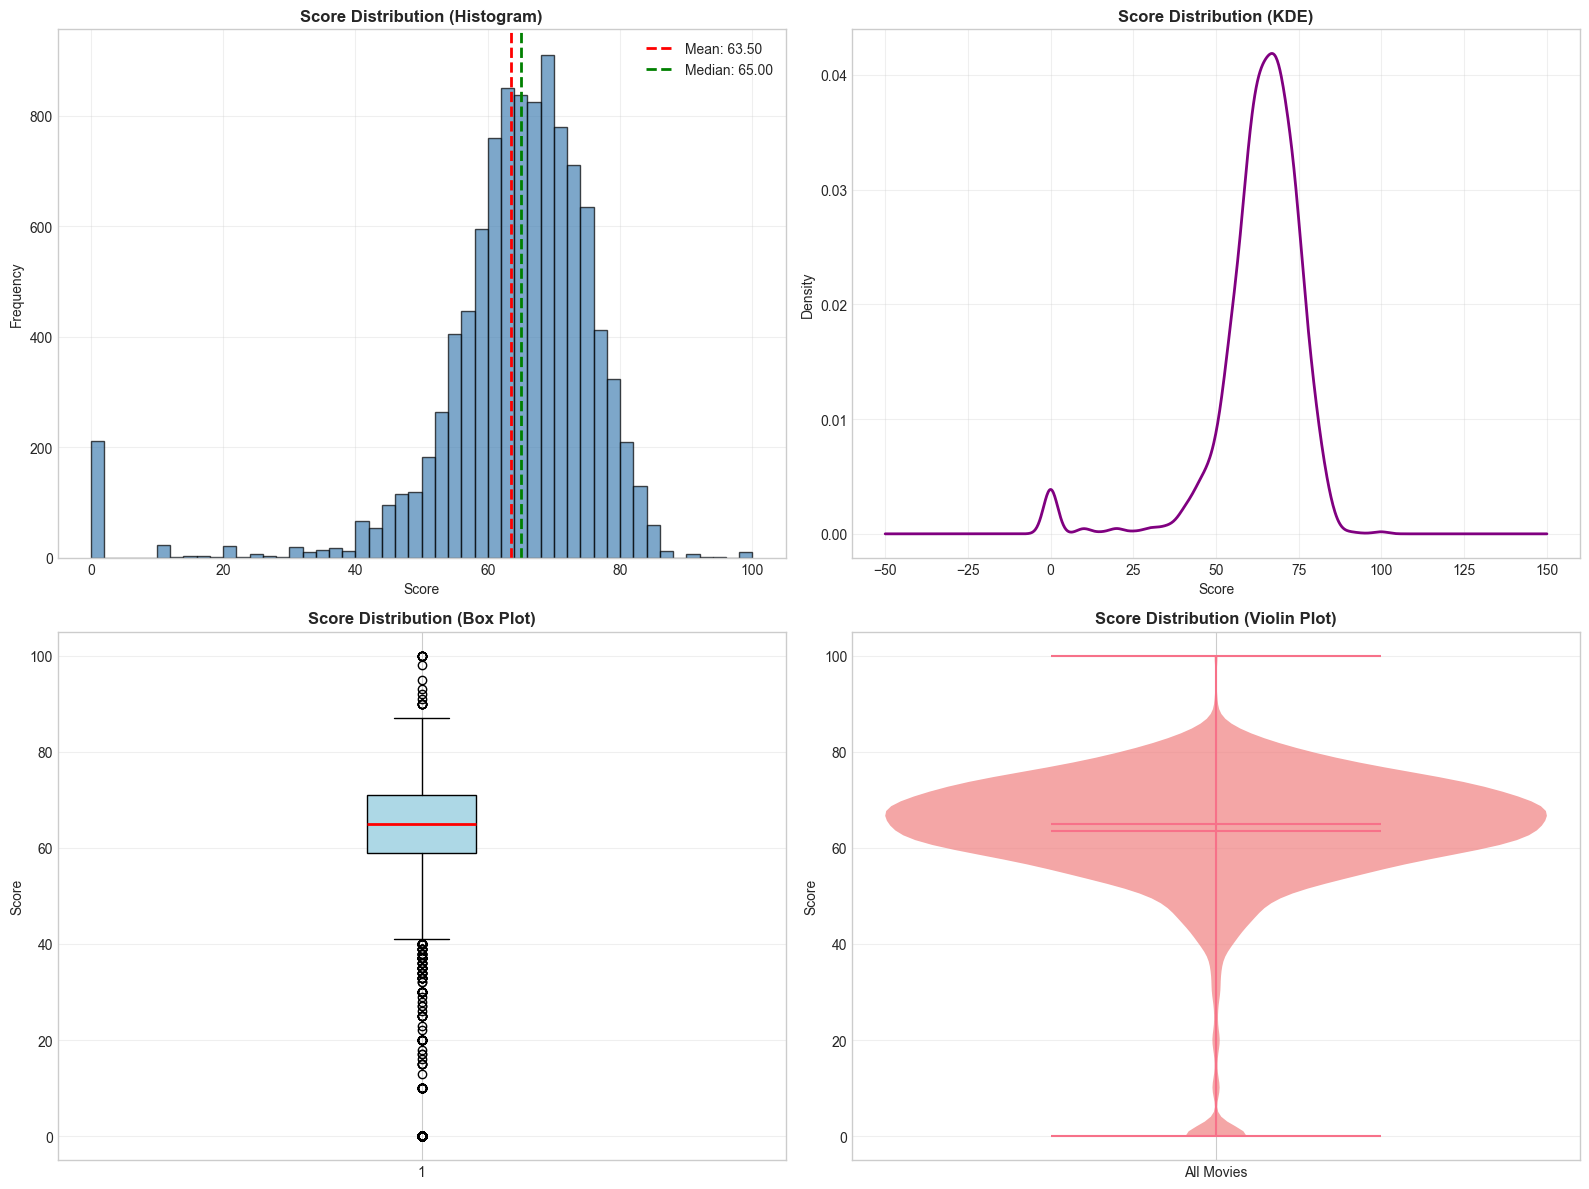

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(df['score'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["score"].mean():.2f}')
axes[0, 0].axvline(df['score'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["score"].median():.2f}')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Score Distribution (Histogram)', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

df['score'].plot(kind='density', ax=axes[0, 1], color='purple', linewidth=2)
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('Score Distribution (KDE)', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].boxplot(df['score'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', edgecolor='black'),
                    medianprops=dict(color='red', linewidth=2),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'))
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Score Distribution (Box Plot)', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

parts = axes[1, 1].violinplot([df['score']], positions=[0], showmeans=True, showmedians=True)
for pc in parts['bodies']:
    pc.set_facecolor('lightcoral')
    pc.set_alpha(0.7)
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Score Distribution (Violin Plot)', fontweight='bold')
axes[1, 1].set_xticks([0])
axes[1, 1].set_xticklabels(['All Movies'])
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

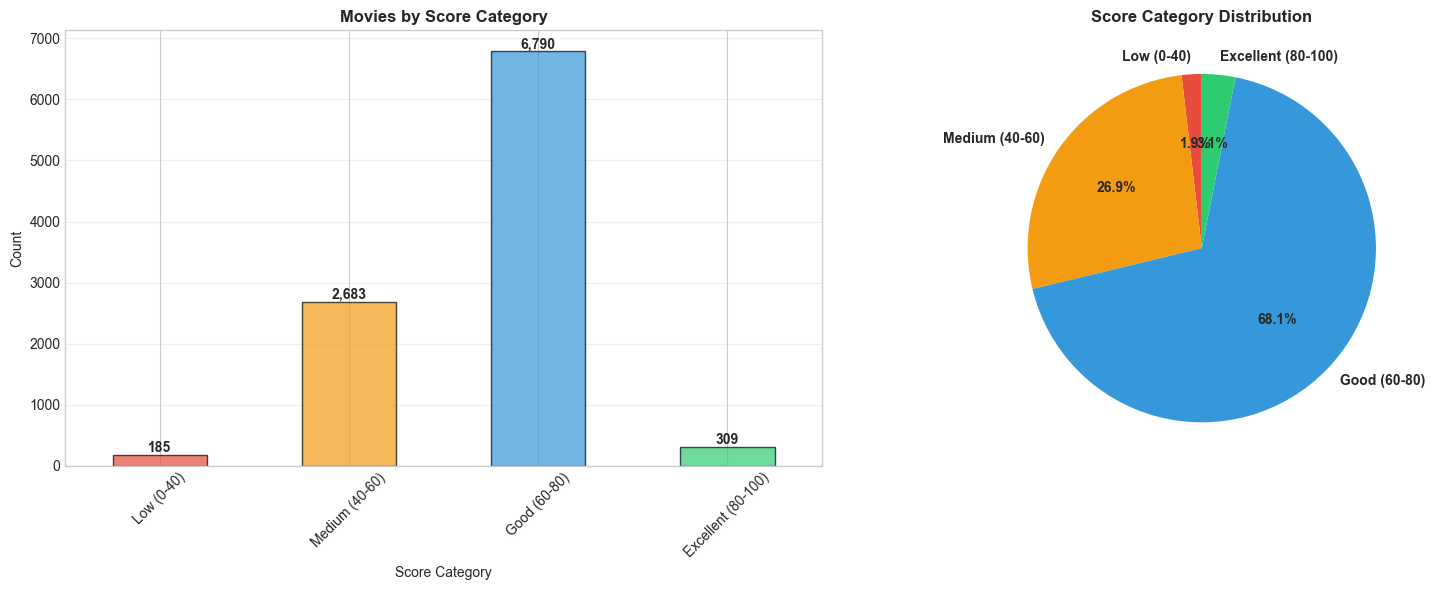

Score Category Distribution:
  Low (0-40): 185 (1.8%)
  Medium (40-60): 2,683 (26.4%)
  Good (60-80): 6,790 (66.7%)
  Excellent (80-100): 309 (3.0%)


In [12]:
df['score_category'] = pd.cut(df['score'], bins=[0, 40, 60, 80, 100], 
                               labels=['Low (0-40)', 'Medium (40-60)', 'Good (60-80)', 'Excellent (80-100)'])

category_counts = df['score_category'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

category_counts.plot(kind='bar', ax=axes[0], color=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'], 
                      edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Score Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Movies by Score Category', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

for i, v in enumerate(category_counts):
    axes[0].text(i, v + 50, f'{v:,}', ha='center', fontweight='bold')

axes[1].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%',
            colors=['#e74c3c', '#f39c12', '#3498db', '#2ecc71'],
            startangle=90, textprops={'fontweight': 'bold'})
axes[1].set_title('Score Category Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

print("Score Category Distribution:")
for cat, count in category_counts.items():
    print(f"  {cat}: {count:,} ({count/len(df)*100:.1f}%)")

## 4. Temporal Analysis

In [13]:
df['date_x'] = df['date_x'].astype(str).str.strip()
df['year'] = pd.to_datetime(df['date_x'], format='%m/%d/%Y', errors='coerce').dt.year
df['decade'] = (df['year'] // 10) * 10

print(f"Year range: {df['year'].min():.0f} - {df['year'].max():.0f}")
print(f"Total decades: {df['decade'].nunique()}")

Year range: 1903 - 2023
Total decades: 13


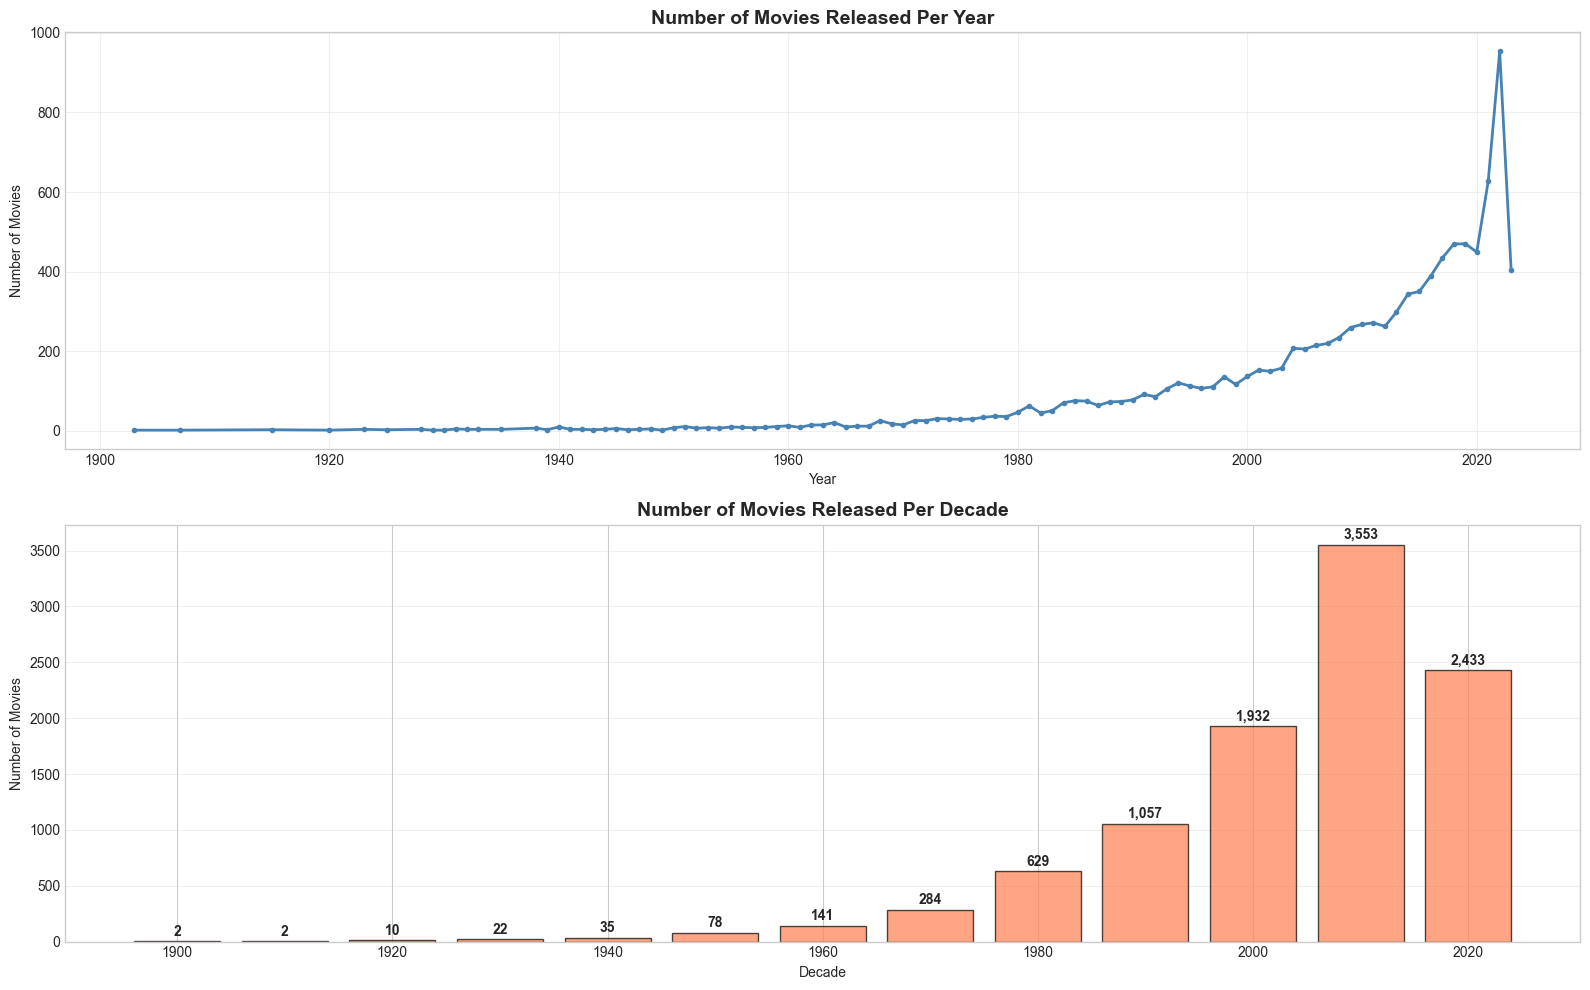

In [14]:
movies_per_year = df.groupby('year').size()

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

axes[0].plot(movies_per_year.index, movies_per_year.values, linewidth=2, color='steelblue', marker='o', markersize=3)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Movies')
axes[0].set_title('Number of Movies Released Per Year', fontweight='bold', fontsize=14)
axes[0].grid(alpha=0.3)

movies_per_decade = df.groupby('decade').size()
axes[1].bar(movies_per_decade.index, movies_per_decade.values, width=8, 
            color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Number of Movies')
axes[1].set_title('Number of Movies Released Per Decade', fontweight='bold', fontsize=14)
axes[1].grid(axis='y', alpha=0.3)

for x, y in zip(movies_per_decade.index, movies_per_decade.values):
    axes[1].text(x, y + 50, f'{y:,}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

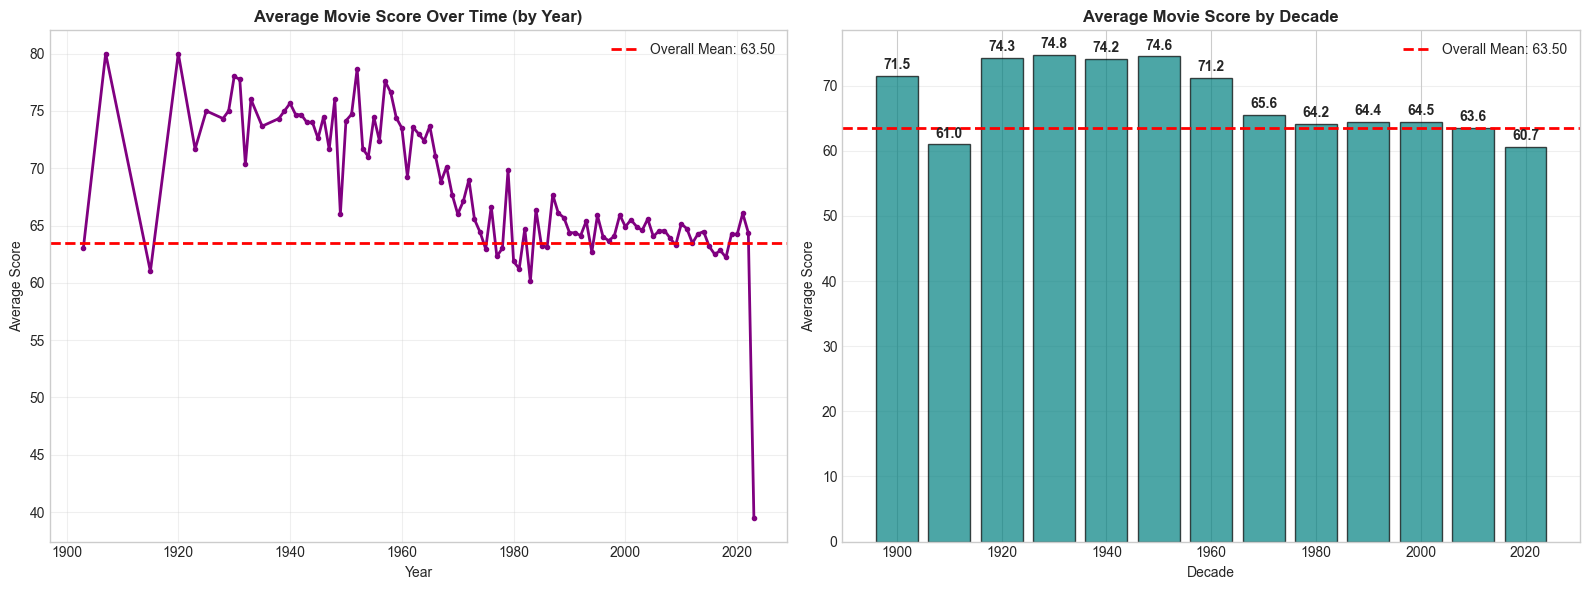

In [15]:
avg_score_per_year = df.groupby('year')['score'].mean()
avg_score_per_decade = df.groupby('decade')['score'].mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(avg_score_per_year.index, avg_score_per_year.values, linewidth=2, color='purple', marker='o', markersize=3)
axes[0].axhline(df['score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Overall Mean: {df["score"].mean():.2f}')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Average Score')
axes[0].set_title('Average Movie Score Over Time (by Year)', fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].bar(avg_score_per_decade.index, avg_score_per_decade.values, width=8,
            color='teal', edgecolor='black', alpha=0.7)
axes[1].axhline(df['score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Overall Mean: {df["score"].mean():.2f}')
axes[1].set_xlabel('Decade')
axes[1].set_ylabel('Average Score')
axes[1].set_title('Average Movie Score by Decade', fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

for x, y in zip(avg_score_per_decade.index, avg_score_per_decade.values):
    axes[1].text(x, y + 1, f'{y:.1f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Financial Analysis

In [16]:
print("FINANCIAL STATISTICS")
print("="*60)
print(f"Budget:")
print(f"  Mean: ${df['budget_x'].mean():,.0f}")
print(f"  Median: ${df['budget_x'].median():,.0f}")
print(f"  Max: ${df['budget_x'].max():,.0f}")
print(f"Revenue:")
print(f"  Mean: ${df['revenue'].mean():,.0f}")
print(f"  Median: ${df['revenue'].median():,.0f}")
print(f"  Max: ${df['revenue'].max():,.0f}")

df['roi'] = ((df['revenue'] - df['budget_x']) / df['budget_x']) * 100
df['roi'] = df['roi'].replace([np.inf, -np.inf], np.nan)

print(f"ROI:")
print(f"  Mean: {df['roi'].mean():.1f}%")
print(f"  Median: {df['roi'].median():.1f}%")

FINANCIAL STATISTICS
Budget:
  Mean: $64,882,379
  Median: $50,000,000
  Max: $460,000,000
Revenue:
  Mean: $253,140,093
  Median: $152,934,876
  Max: $2,923,706,026
ROI:
  Mean: 2964105.5%
  Median: 229.0%


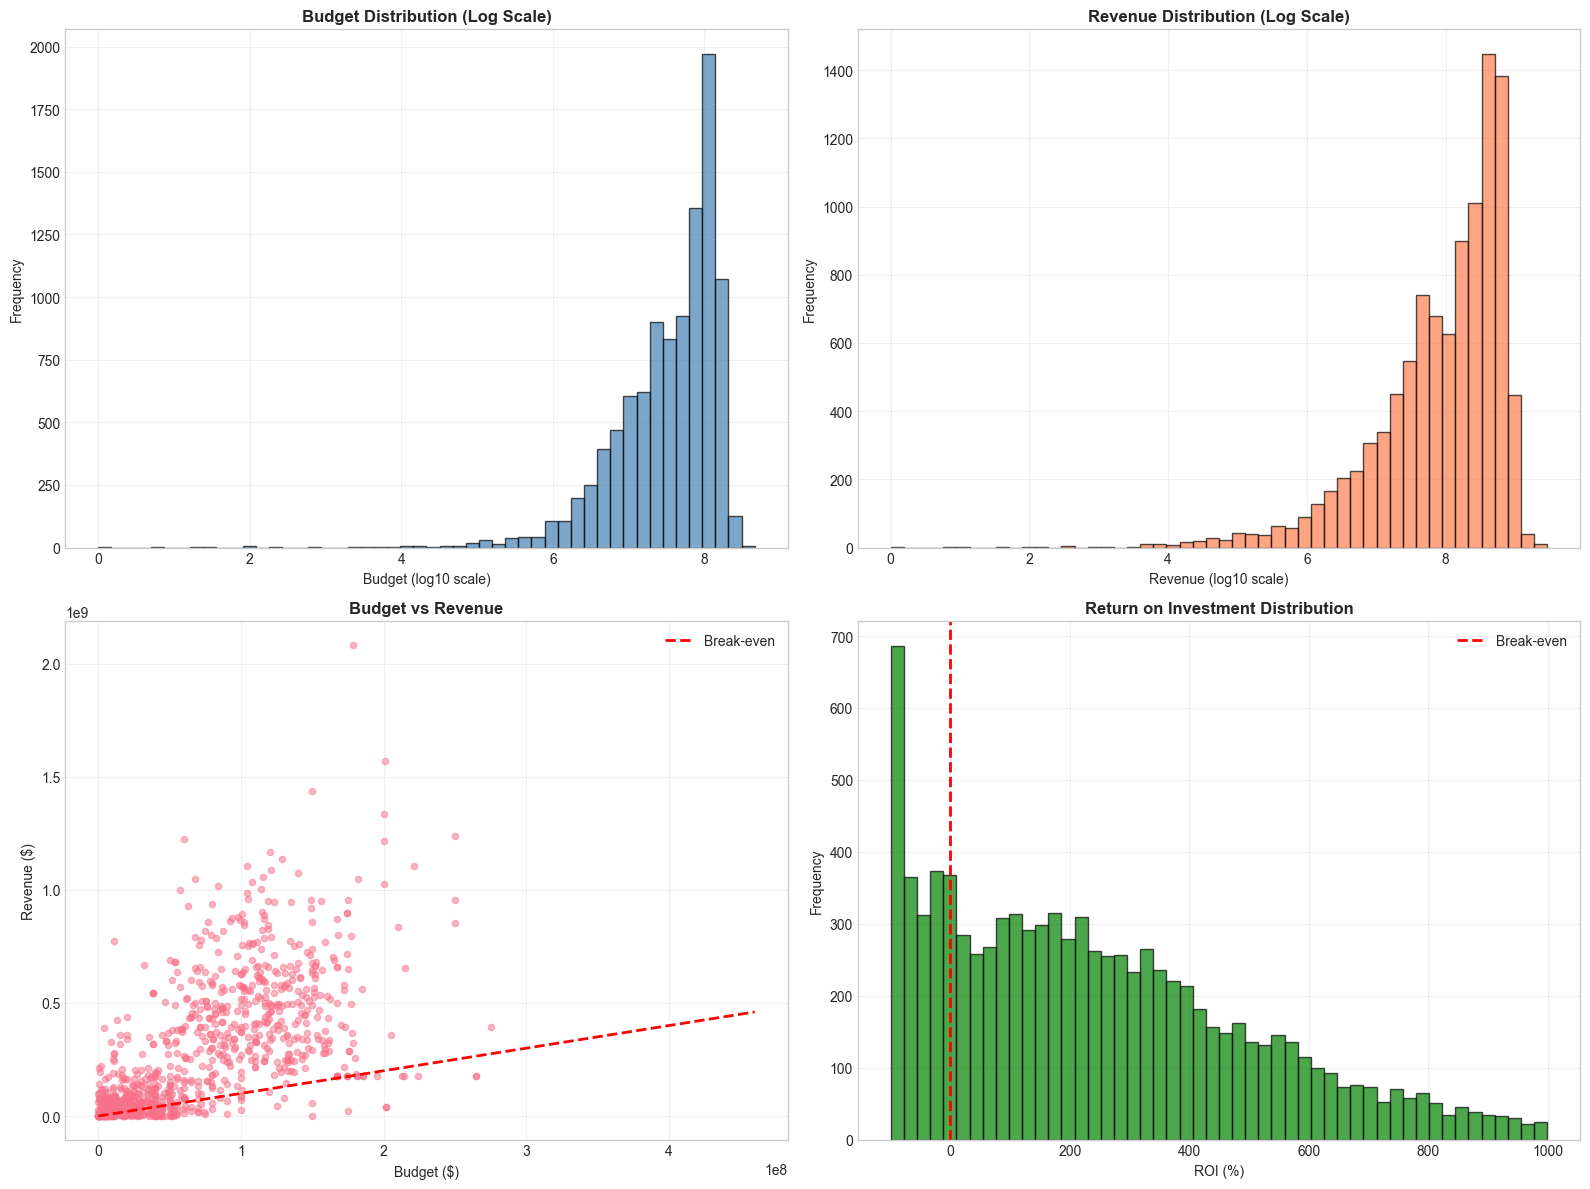

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

budget_nonzero = df[df['budget_x'] > 0]['budget_x']
axes[0, 0].hist(np.log10(budget_nonzero), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Budget (log10 scale)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Budget Distribution (Log Scale)', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

revenue_nonzero = df[df['revenue'] > 0]['revenue']
axes[0, 1].hist(np.log10(revenue_nonzero), bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Revenue (log10 scale)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Revenue Distribution (Log Scale)', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

sample = df[(df['budget_x'] > 0) & (df['revenue'] > 0)].sample(min(1000, len(df)))
axes[1, 0].scatter(sample['budget_x'], sample['revenue'], alpha=0.5, s=20)
axes[1, 0].plot([0, df['budget_x'].max()], [0, df['budget_x'].max()], 'r--', linewidth=2, label='Break-even')
axes[1, 0].set_xlabel('Budget ($)')
axes[1, 0].set_ylabel('Revenue ($)')
axes[1, 0].set_title('Budget vs Revenue', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

roi_clean = df['roi'].dropna()
roi_clean = roi_clean[(roi_clean > -100) & (roi_clean < 1000)]  # Remove extreme outliers
axes[1, 1].hist(roi_clean, bins=50, color='green', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even')
axes[1, 1].set_xlabel('ROI (%)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Return on Investment Distribution', fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

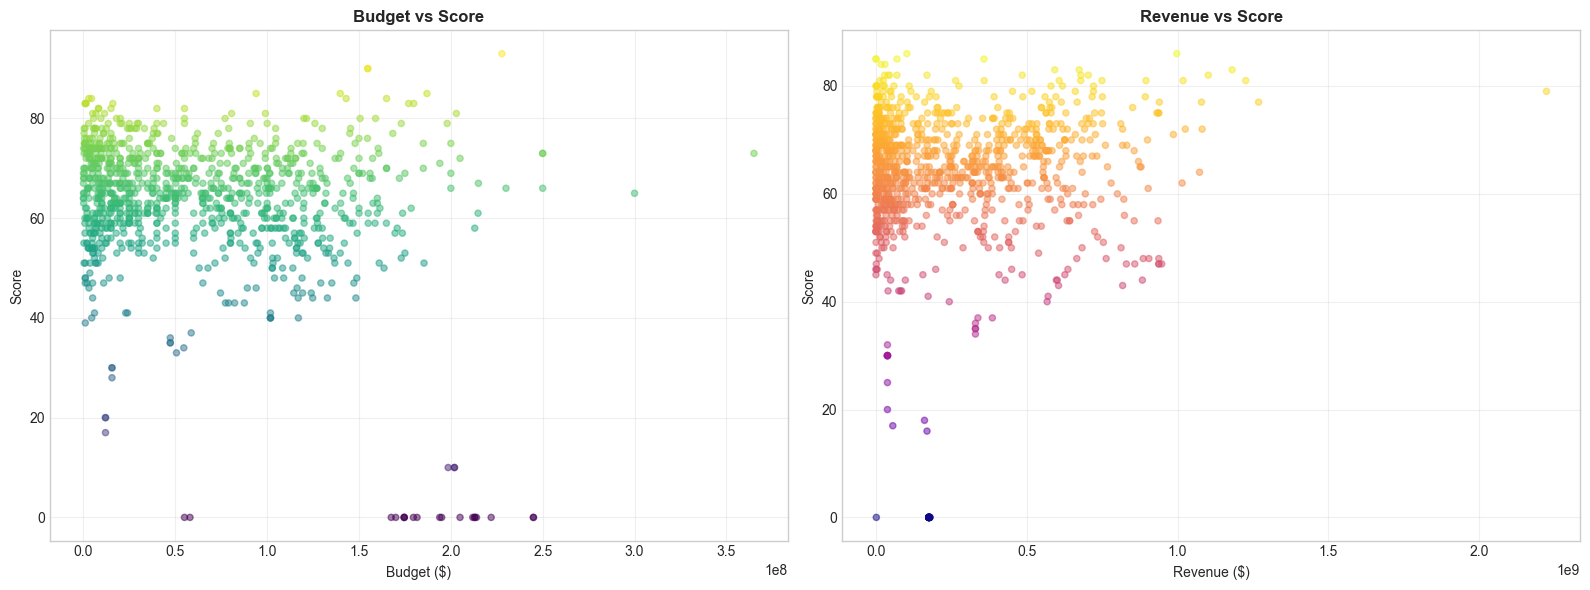

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sample = df[df['budget_x'] > 0].sample(min(1000, len(df)))
axes[0].scatter(sample['budget_x'], sample['score'], alpha=0.5, s=20, c=sample['score'], cmap='viridis')
axes[0].set_xlabel('Budget ($)')
axes[0].set_ylabel('Score')
axes[0].set_title('Budget vs Score', fontweight='bold')
axes[0].grid(alpha=0.3)

sample = df[df['revenue'] > 0].sample(min(1000, len(df)))
axes[1].scatter(sample['revenue'], sample['score'], alpha=0.5, s=20, c=sample['score'], cmap='plasma')
axes[1].set_xlabel('Revenue ($)')
axes[1].set_ylabel('Score')
axes[1].set_title('Revenue vs Score', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Genre Analysis

In [19]:
all_genres = []
for genres_str in df['genre'].dropna():
    all_genres.extend([g.strip() for g in str(genres_str).split(',')])

from collections import Counter
genre_counts = Counter(all_genres)
top_genres = dict(genre_counts.most_common(15))

print(f"Total unique genres: {len(genre_counts)}")
print(f"Top 15 genres:")
for genre, count in list(top_genres.items())[:15]:
    print(f"  {genre}: {count:,}")

Total unique genres: 19
Top 15 genres:
  Drama: 3,812
  Comedy: 2,943
  Action: 2,752
  Thriller: 2,605
  Adventure: 1,890
  Romance: 1,576
  Horror: 1,554
  Animation: 1,468
  Family: 1,407
  Fantasy: 1,382
  Crime: 1,272
  Science Fiction: 1,261
  Mystery: 862
  History: 422
  War: 282


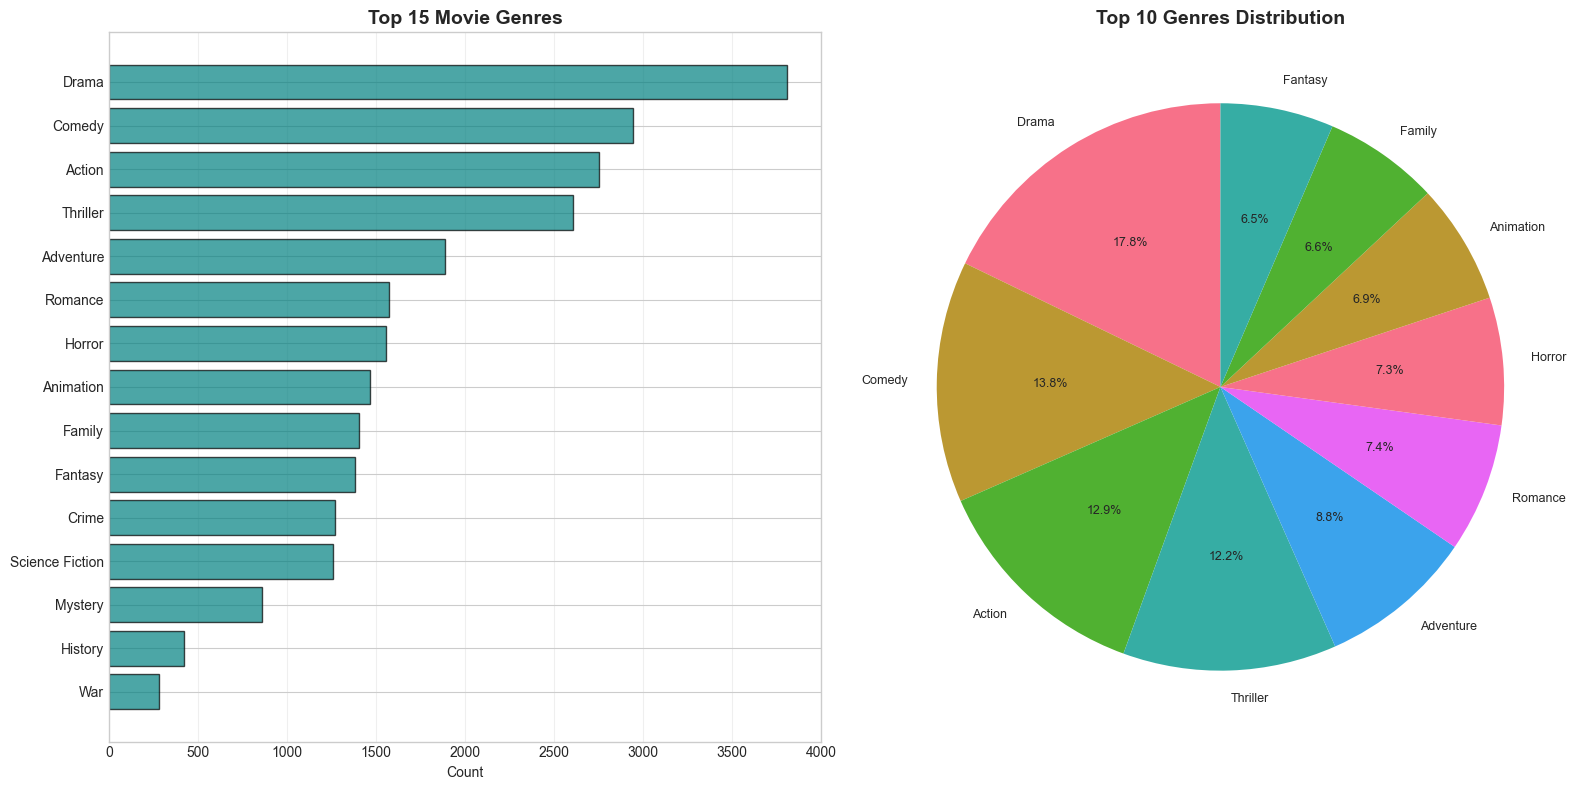

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

genres = list(top_genres.keys())
counts = list(top_genres.values())
axes[0].barh(range(len(genres)), counts, color='teal', edgecolor='black', alpha=0.7)
axes[0].set_yticks(range(len(genres)))
axes[0].set_yticklabels(genres)
axes[0].set_xlabel('Count')
axes[0].set_title('Top 15 Movie Genres', fontweight='bold', fontsize=14)
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

top_10_genres = dict(list(top_genres.items())[:10])
axes[1].pie(top_10_genres.values(), labels=top_10_genres.keys(), autopct='%1.1f%%',
            startangle=90, textprops={'fontsize': 9})
axes[1].set_title('Top 10 Genres Distribution', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

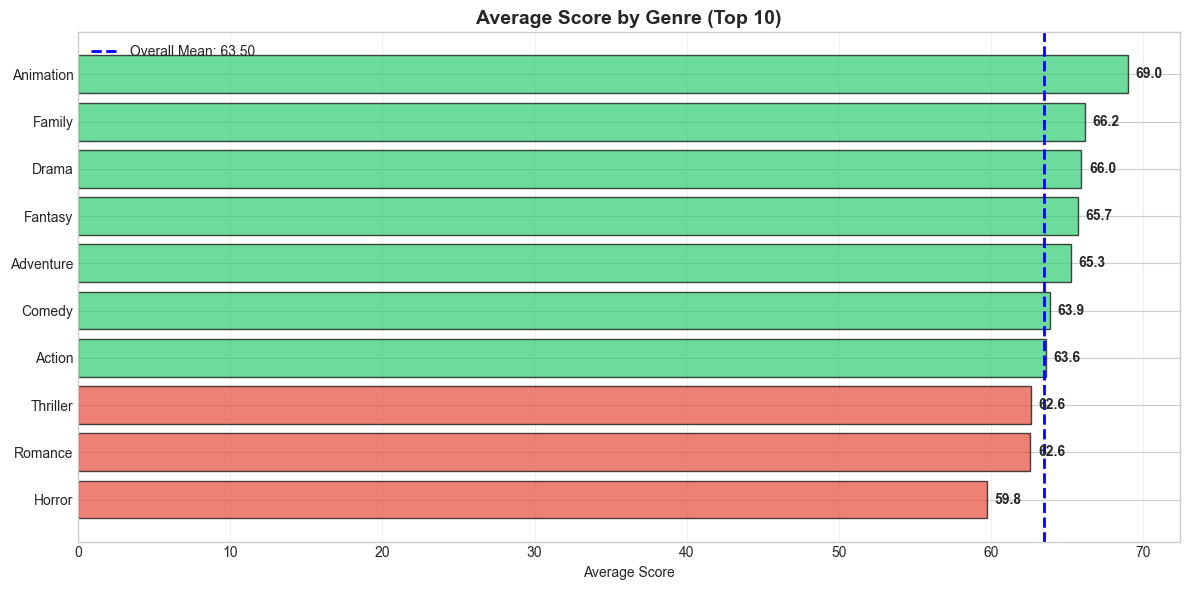

In [21]:
genre_scores = {}
for genre in list(top_genres.keys())[:10]:
    mask = df['genre'].str.contains(genre, na=False, case=False)
    genre_scores[genre] = df[mask]['score'].mean()

genre_scores_sorted = dict(sorted(genre_scores.items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(figsize=(12, 6))
genres = list(genre_scores_sorted.keys())
scores = list(genre_scores_sorted.values())

colors = ['#2ecc71' if s > df['score'].mean() else '#e74c3c' for s in scores]
ax.barh(range(len(genres)), scores, color=colors, edgecolor='black', alpha=0.7)
ax.set_yticks(range(len(genres)))
ax.set_yticklabels(genres)
ax.set_xlabel('Average Score')
ax.set_title('Average Score by Genre (Top 10)', fontweight='bold', fontsize=14)
ax.axvline(df['score'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Overall Mean: {df["score"].mean():.2f}')
ax.invert_yaxis()
ax.legend()
ax.grid(axis='x', alpha=0.3)

for i, v in enumerate(scores):
    ax.text(v + 0.5, i, f'{v:.1f}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

## 7. Language & Country Analysis

In [22]:
top_languages = df['orig_lang'].value_counts().head(10)

print(f"Total unique languages: {df['orig_lang'].nunique()}")
print(f"Top 10 languages:")
print(top_languages)

top_countries = df['country'].value_counts().head(10)

print(f"Total unique countries: {df['country'].nunique()}")
print(f"Top 10 countries:")
print(top_countries)

Total unique languages: 54
Top 10 languages:
orig_lang
English               7417
Japanese               714
Spanish, Castilian     397
Korean                 388
French                 285
Chinese                153
Cantonese              145
Italian                142
German                  93
Russian                 66
Name: count, dtype: int64
Total unique countries: 60
Top 10 countries:
country
AU    4885
US    2750
JP     538
KR     361
FR     222
GB     174
ES     153
HK     125
IT     123
MX     105
Name: count, dtype: int64


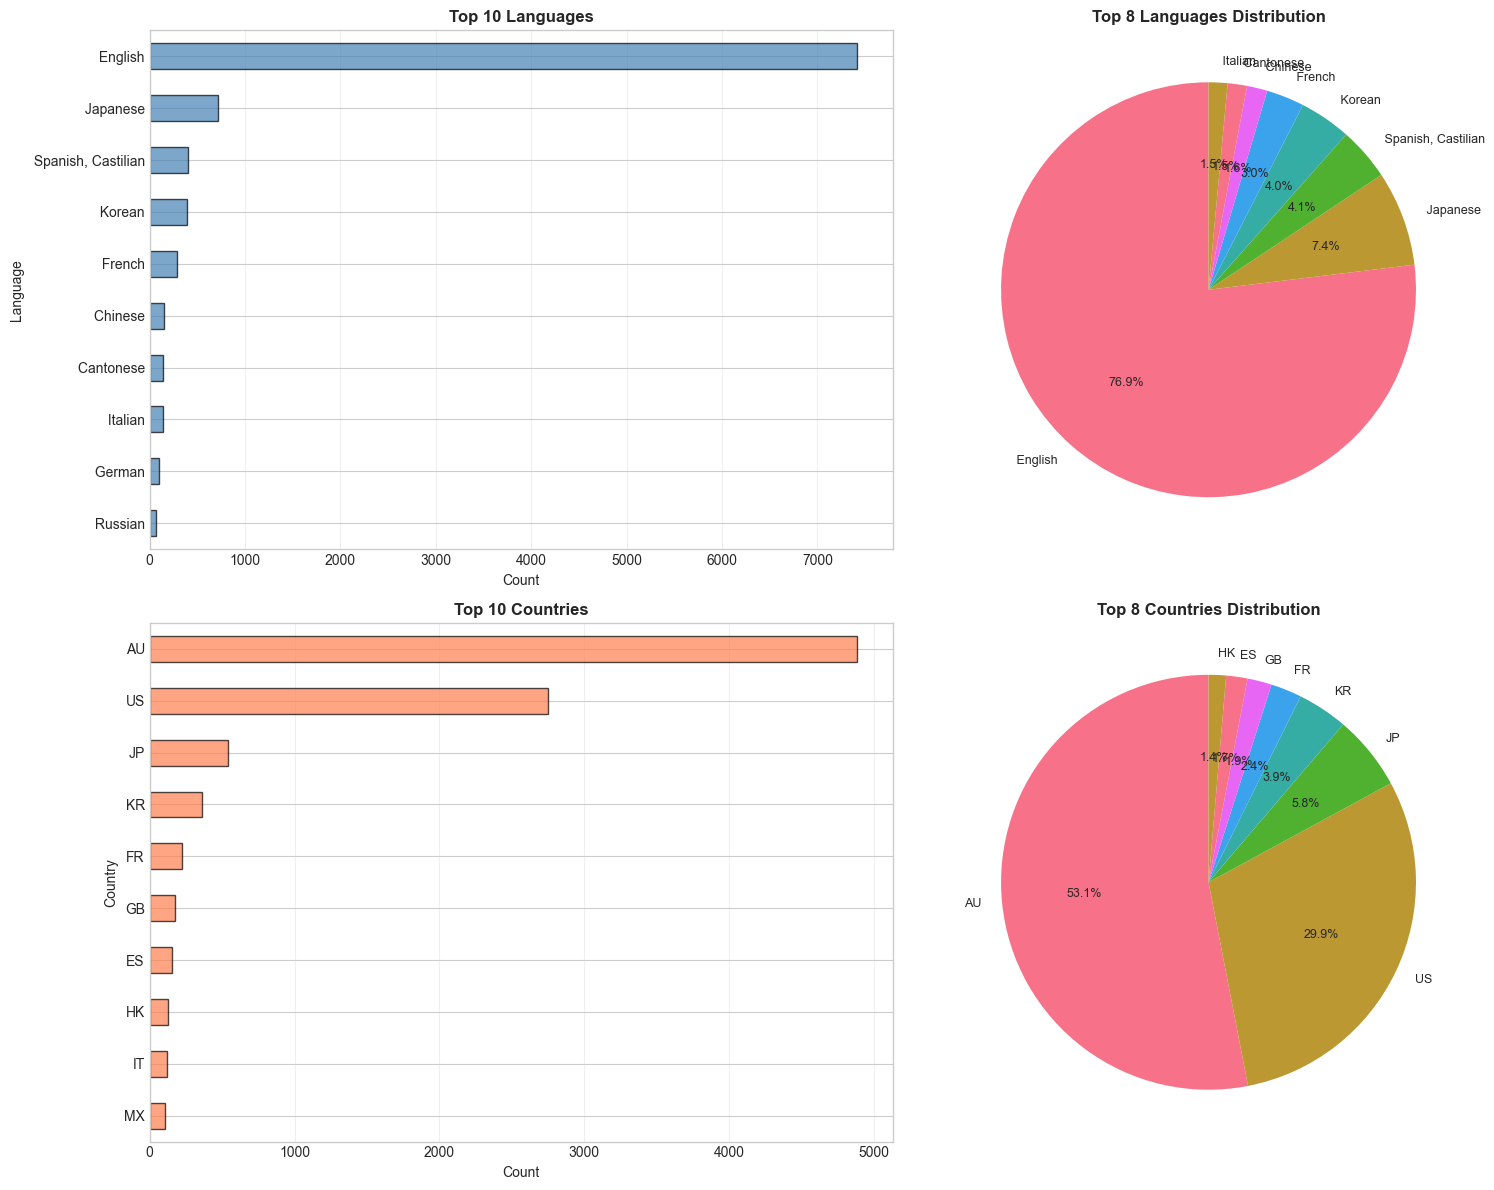

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_languages.plot(kind='barh', ax=axes[0, 0], color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Language')
axes[0, 0].set_title('Top 10 Languages', fontweight='bold')
axes[0, 0].invert_yaxis()
axes[0, 0].grid(axis='x', alpha=0.3)

axes[0, 1].pie(top_languages.head(8), labels=top_languages.head(8).index, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 9})
axes[0, 1].set_title('Top 8 Languages Distribution', fontweight='bold')

top_countries.plot(kind='barh', ax=axes[1, 0], color='coral', edgecolor='black', alpha=0.7)
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Country')
axes[1, 0].set_title('Top 10 Countries', fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

axes[1, 1].pie(top_countries.head(8), labels=top_countries.head(8).index, autopct='%1.1f%%',
               startangle=90, textprops={'fontsize': 9})
axes[1, 1].set_title('Top 8 Countries Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

## 8. Correlation Analysis

CORRELATION MATRIX
             score  budget_x   revenue      year
score     1.000000 -0.235470  0.096533 -0.145398
budget_x -0.235470  1.000000  0.673830  0.238087
revenue   0.096533  0.673830  1.000000  0.150143
year     -0.145398  0.238087  0.150143  1.000000


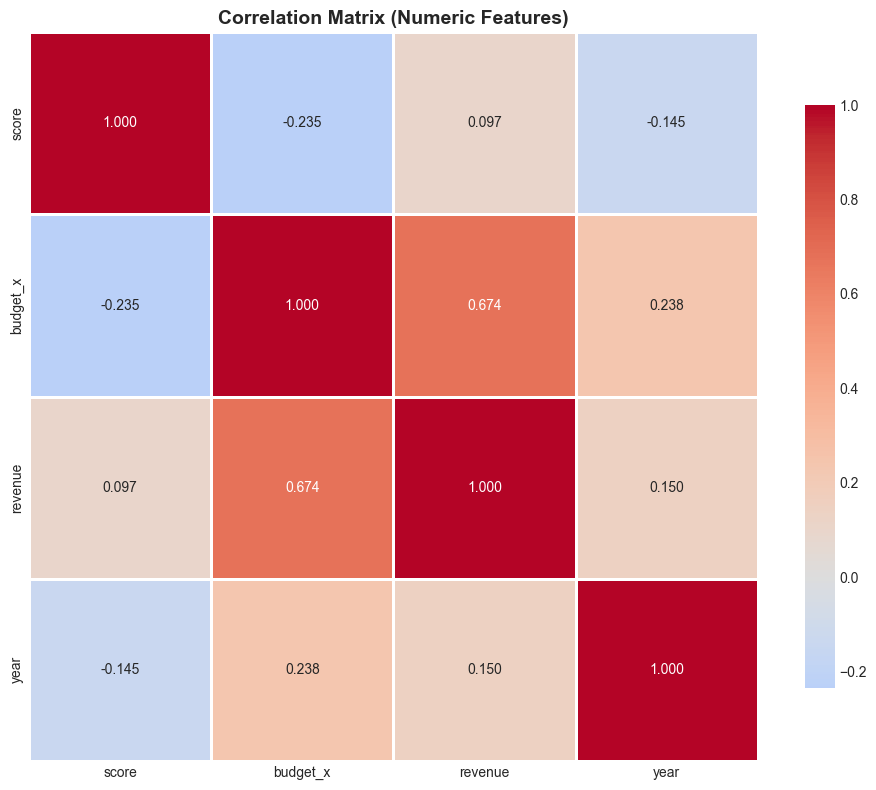

In [24]:
numeric_cols = ['score', 'budget_x', 'revenue', 'year']
correlation_matrix = df[numeric_cols].corr()

print("CORRELATION MATRIX")
print("="*60)
print(correlation_matrix)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax)
ax.set_title('Correlation Matrix (Numeric Features)', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

## 9. Text Features Analysis

In [25]:
df['overview_length'] = df['overview'].fillna('').astype(str).str.len()
df['crew_size'] = df['crew'].fillna('').astype(str).str.split(',').str.len()

print("TEXT FEATURES STATISTICS")
print("="*60)
print(f"Overview Length:")
print(f"  Mean: {df['overview_length'].mean():.0f} characters")
print(f"  Median: {df['overview_length'].median():.0f} characters")
print(f"  Max: {df['overview_length'].max():.0f} characters")
print(f"Crew Size:")
print(f"  Mean: {df['crew_size'].mean():.1f} people")
print(f"  Median: {df['crew_size'].median():.0f} people")
print(f"  Max: {df['crew_size'].max():.0f} people")

TEXT FEATURES STATISTICS
Overview Length:
  Mean: 281 characters
  Median: 246 characters
  Max: 998 characters
Crew Size:
  Mean: 17.1 people
  Median: 18 people
  Max: 24 people


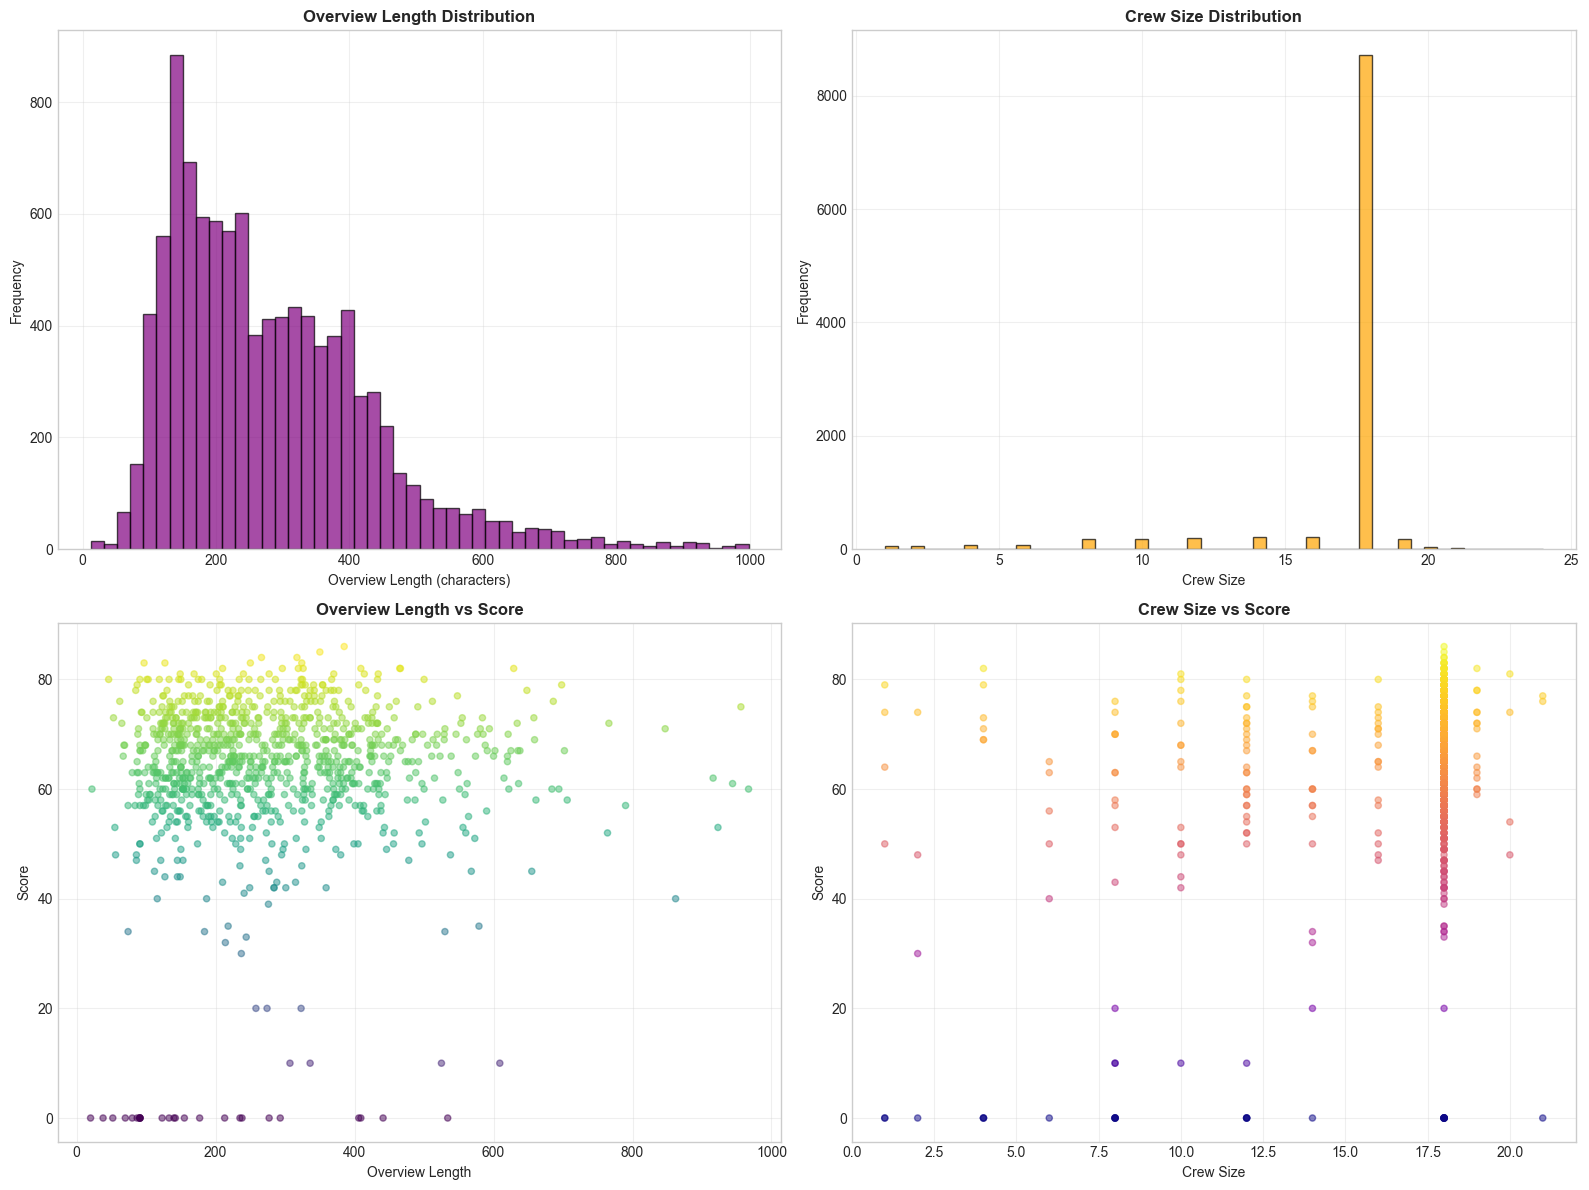

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].hist(df['overview_length'], bins=50, color='purple', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Overview Length (characters)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Overview Length Distribution', fontweight='bold')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].hist(df['crew_size'], bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Crew Size')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Crew Size Distribution', fontweight='bold')
axes[0, 1].grid(alpha=0.3)

sample = df.sample(min(1000, len(df)))
axes[1, 0].scatter(sample['overview_length'], sample['score'], alpha=0.5, s=20, c=sample['score'], cmap='viridis')
axes[1, 0].set_xlabel('Overview Length')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Overview Length vs Score', fontweight='bold')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].scatter(sample['crew_size'], sample['score'], alpha=0.5, s=20, c=sample['score'], cmap='plasma')
axes[1, 1].set_xlabel('Crew Size')
axes[1, 1].set_ylabel('Score')
axes[1, 1].set_title('Crew Size vs Score', fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()